In [ ]:
##Jake Affaneh-uploading the video file and cropping the first image to identify lane lines

In [1]:
import cv2

In [2]:
parser = argparse.ArgumentParser()

NameError: name 'argparse' is not defined

In [3]:
import argparse

In [4]:
from IPython.display import Video

In [5]:
Video("Lab1VideoClip10Sec.mp4")

In [6]:
import matplotlib.pylab as plt

In [7]:
import cv2

In [8]:
import numpy as np

In [38]:
image = cv2.imread("ImageLab1.png")

In [40]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [41]:
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

In [42]:
def show_with_matplotlib(color_img, title, pos): """Shows an image using matplotlib capabilities"""

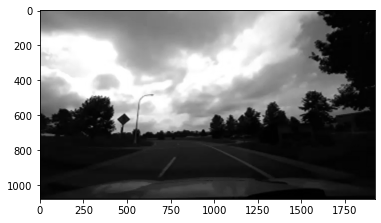

In [44]:
plt.imshow(gray_image, cmap='gray')

In [45]:
plt.figure(figsize=(12, 6))
plt.suptitle("Comparing different kernels using cv2.filter2D()", fontsize=14, fontweight='bold')


Text(0.5, 0.98, 'Comparing different kernels using cv2.filter2D()')

<Figure size 864x432 with 0 Axes>

In [52]:
def drow_the_lines(img, lines):
    img = np.copy(img)
    blank_image = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(blank_image, (x1,y1), (x2,y2), (0,255, 0), thickness=3)
            
    img = cv2.addWeighted(img, 0.8, blank_image, 1, 0.0)
    return img

In [54]:
print(gray_image.shape)

(1080, 1920)


In [55]:
height = image.shape[0]

In [56]:
width = image.shape[1]

In [116]:
region_of_interest_vertices = [
    (500, 1000),
    (500, 750),
    (1200, 740),
    (1500, 1000)
]

In [117]:
def region_of_interest(img, vertices):
    plt.imshow(img)
    mask = np.zeros_like(img)
    #channel_count = img.shape[2]
    match_mask_color = 255
    mask = cv2.fillPoly(mask, vertices, match_mask_color)
    #plt.imshow(mask)
    masked_image = cv2.bitwise_and(img, mask)
    #plt.imshow(masked_image)
    return masked_image

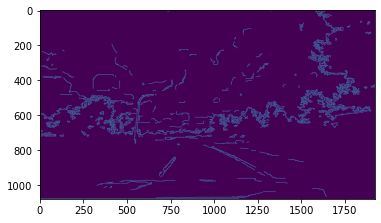

In [118]:
canny_image = cv2.Canny(gray_image, 15, 50)
plt.imshow(canny_image)

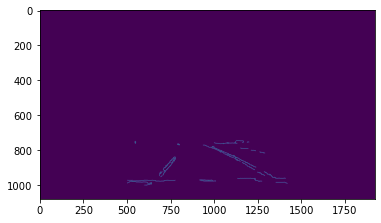

In [119]:
cropped_image = region_of_interest(canny_image,
                                  np.array([region_of_interest_vertices],np.int32))
plt.imshow(cropped_image)

In [120]:
print(cropped_image.shape)
lines = cv2.HoughLinesP(cropped_image,
                       rho=6,
                       theta=np.pi/60,
                       threshold=160,
                       lines=np.array([]),
                       minLineLength=40,
                       maxLineGap=25)

(1080, 1920)


In [121]:
image_with_lines = drow_the_lines(image, lines)

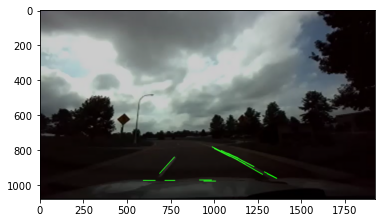

In [122]:
plt.imshow(image_with_lines)

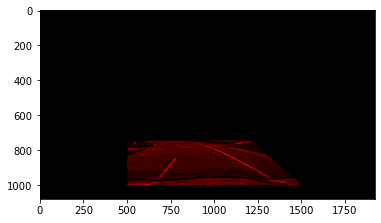

In [124]:
plt.imshow(cropped_image)

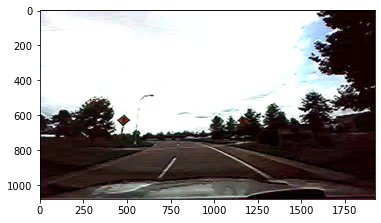

In [123]:
#cropped_image = region_of_interest(sobel_y_image,
                                 # np.array([region_of_interest_vertices],np.int32))